In [3]:
import forward_model as fm 
import numpy as np
import pandas as pd
import baker_hubbard_pf as bh


In [113]:
peptide = 'QGSGYPFTFGGGTKVEIKRTVAAPSV'
charge = 4
nist = pd.read_csv('/Users/yuliagutierrez/Downloads/nist_fab_lab1a.csv')
ex1 = nist.query(f"Peptide == '{peptide}'")
ex1['0s'] = ex1['0s_L1A'] - ex1['0s_L1A']
ex1['30s'] = ex1['30s_L1Ar1'] - ex1['0s_L1A']
ex1['60s'] = ex1['60s_L1A'] - ex1['0s_L1A']
ex1['300s'] = ex1['300s_L1A'] - ex1['0s_L1A']
ex1['900s'] = ex1['900s_L1A'] - ex1['0s_L1A']
ex1['3600s'] = ex1['3600s_L1A'] - ex1['0s_L1A']
ex1['14400s'] = ex1['14400s_L1A'] - ex1['0s_L1A']
ex1['86400s'] = ex1['full'] - ex1['0s_L1A']
ex1


/var/folders/n0/ny5865_5769bgkky50n4qpg40000gp/T/ipykernel_4828/1830439984.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex1['0s'] = ex1['0s_L1A'] - ex1['0s_L1A']
/var/folders/n0/ny5865_5769bgkky50n4qpg40000gp/T/ipykernel_4828/1830439984.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex1['30s'] = ex1['30s_L1Ar1'] - ex1['0s_L1A']
/var/folders/n0/ny5865_5769bgkky50n4qpg40000gp/T/ipykernel_4828/1830439984.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Chain,Peptide,charge(z),0s_L1A,30s_L1Ar1,60s_L1A,300s_L1A,900s_L1A,3600s_L1A,14400s_L1A,full,0s,30s,60s,300s,900s,3600s,14400s,86400s
126,LC,QGSGYPFTFGGGTKVEIKRTVAAPSV,4,664.751067,665.7021,665.756733,665.861867,666.011633,666.222067,666.409367,668.282867,0.0,0.951033,1.005667,1.1108,1.260567,1.471,1.6583,3.5318


In [102]:
# with open('peptide_indices.txt', 'w') as output_file:
#     for peptide in peptide_list:
#         print(peptide)
#         try:
#             result = fm.find_peptide_in_full_sequence(peptide, path_to_pdb='/Users/yuliagutierrez/Downloads/fab_h.pdb')
#             # Assuming result is a tuple of two numbers
#             output_file.write(f"{result[0]} {result[1]}\n")
#         except ValueError as e:  # Replace ValueError with the specific exception if known
#             print(f"Peptide {peptide} not found in the full sequence. Continuing...")
#             continue

In [116]:
ex1_T = ex1.T.reset_index()
#keep rows that are time points 
ex1_T = ex1_T[11:]
ex1_T = ex1_T.rename(columns = {'index':'time'})
ex1_T['time'] = ex1_T['time'].str.replace('s','')
ex1_T['time'] = ex1_T['time'].astype(int)
#create a column called "mass delta" that is the column named 0 multiplied by ex1['charge(z)']
ex1_T['mass_delta'] = ex1_T[126] * charge
ex1_T


,time,126,mass_delta
11,0,0.0,0.0
12,30,0.951033,3.804133
13,60,1.005667,4.022666
14,300,1.1108,4.4432
15,900,1.260567,5.042266
16,3600,1.471,5.884
17,14400,1.6583,6.6332
18,86400,3.5318,14.1272


In [117]:
ex1_T.columns

Index(['time', 126, 'mass_delta'], dtype='object')

In [118]:
#read in hdxer data
hdxer_path = '/Users/yuliagutierrez/Desktop/F24/sali_lab/rotation_project/hdxer_fab_logpf.dat'
hdxer_fab = pd.read_csv(hdxer_path, delim_whitespace=True)
hdxer_fab
hdxer_fab.rename(columns={'#': 'res_num', 'ResID': 'hxder_log_pf'}, inplace=True)
hdxer_fab

#drop all columns except for the res_num and hxder_pf
hdxer_fab = hdxer_fab[['res_num', 'hxder_log_pf']]
hdxer_fab
#turn this into a dictionary where res_num is the key and hxder_pf is the value
hdxer_dict = dict(zip(hdxer_fab['res_num'], hdxer_fab['hxder_log_pf']))
#if hdxer dict deosn't have all key between 1-440, add missig ones with a value of 0
for i in range(1, 441):
    if i not in hdxer_dict:
        hdxer_dict[i] = 0


/var/folders/n0/ny5865_5769bgkky50n4qpg40000gp/T/ipykernel_4828/2699841675.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  hdxer_fab = pd.read_csv(hdxer_path, delim_whitespace=True)


In [98]:
hdxer_fab


,res_num,hxder_log_pf
0,2,6.30
1,3,8.30
2,4,8.05
3,5,8.30
4,6,8.40
...,...,...
406,436,2.80
407,437,3.85
408,438,6.55
409,439,2.80


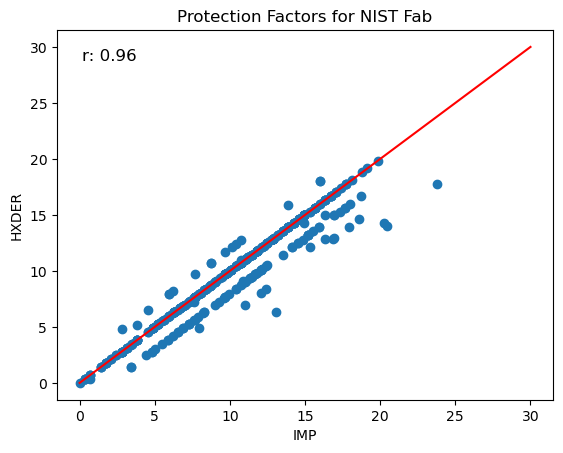

In [125]:
bh.estimate_protection_factors('/Users/yuliagutierrez/Downloads/fab_h.pdb')
#turn this into a dataframe
pf = pd.DataFrame.from_dict(bh.estimate_protection_factors('/Users/yuliagutierrez/Downloads/fab_h.pdb'), orient='index')
pf.reset_index(inplace=True)

#rename columns'index'' as res_num and 0 as pf
pf = pf.rename(columns = {'index':'res_num', 0:'pf'})
pf
#merge the hdxer and pf dataframes on res_num
hdxer_pf = pd.merge(hdxer_fab, pf, on='res_num')
hdxer_pf


#create a scatterp;ot of the hdxer and pf data
import matplotlib.pyplot as plt
plt.scatter(y = hdxer_pf['hxder_log_pf'], x = hdxer_pf['pf'])
plt.xlabel('IMP')
plt.ylabel('HXDER')
plt.title("Protection Factors for NIST Fab")
#add correlation to the plot
correlation_coefficient = hdxer_pf['hxder_log_pf'].corr(hdxer_pf['pf'])
plt.text(0.05, 0.95, f'r: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


#add x = y line
plt.plot([0, 30], [0, 30], color='red')
plt.savefig('nist_fab.png', dpi = 600)


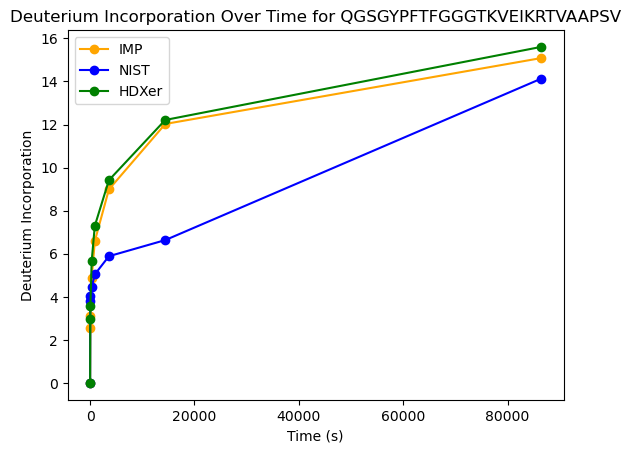

In [ ]:
#cakculate the percentage deuterium for the first peptide over time 
#
timepoints = [0, 30, 60, 300, 900, 3600, 14400, 86400]

percent_deut = [fm.calc_percentage_deuterium_per_peptide(peptide, 0.85, time, 7, 300, '/Users/yuliagutierrez/Downloads/fab_h.pdb') for time in timepoints]
percent_deut_hdxer= [fm.calc_percentage_deuterium_per_peptide_hdxer(peptide, hdxer_dict, 0.85, time, 7, 300, '/Users/yuliagutierrez/Downloads/fab_h.pdb') for time in timepoints]
#plot 
plt.plot(timepoints, percent_deut, color = 'orange', marker = 'o', label = 'IMP')
plt.plot(ex1_T['time'],ex1_T['mass_delta'], color = 'blue', marker = 'o', label = 'NIST')
plt.plot(timepoints, percent_deut_hdxer, color = 'green', marker = 'o', label = 'HDXer')
plt.legend()

#change x and y labels
plt.xlabel('Time (s)')
plt.ylabel('Deuterium Incorporation')
plt.title(f'Deuterium Incorporation Over Time for {peptide}')
plt.savefig(f'{peptide}_deuteration.png')


In [10]:
fm.calc_percentage_deuterium_per_peptide('YSLSSTL', 0.85, 30, 3, 300, '/Users/yuliagutierrez/Downloads/fab_h.pdb')

7.549516567451064e-16

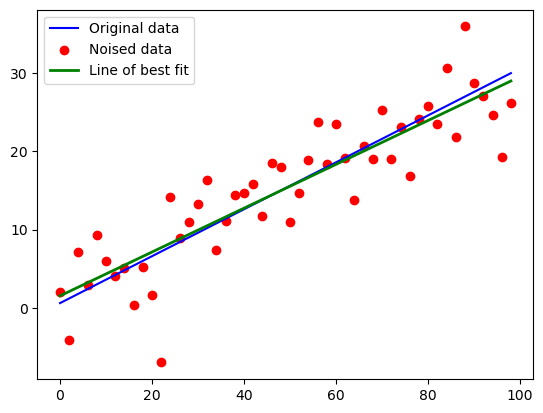

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Data creation

# Create independent variable 
x = np.arange(0,100,2) # Produces [0, 100) with steps of 2.

# Use a linear function to obtain the dependent variable 
y = 0.3*x + 0.6 # Parameters are arbitrary. 

# Noise generation

# Genearte noise with same size as that of the data.
noise = np.random.normal(0,4, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.

# Add the noise to the data. 
y_noised = y + noise  # Since both y and noise are numpy arrays of same size, the addition is done element-wise.

# Plot the data
plt.plot(x, y, label='Original data', color='blue')
plt.scatter(x, y_noised, label='Noised data', color='red')
#plot line of best fit of the noised data
plt.plot(x, np.poly1d(np.polyfit(x, y_noised,1 ))(x), color='green', label='Line of best fit', linewidth=2)
plt.legend()


## Getting Percentage Deuteration with Ideal Forward Model for State A of fold-swtich 



In [4]:
from tryptic_peptides import *
#hide all warnings
import warnings
warnings.filterwarnings('ignore')

pdb_file = '/Users/yuliagutierrez/Downloads/prep_stateU.pdb'
#pulling out the light chain sequence from the pdb file 
protein_sequence = get_protein_sequences_from_pdb(pdb_file)[0]
cut_sites= find_cut_sites(protein_sequence)
fragments = generate_fragments(pdb_file)
fragments = set(fragments)

In [5]:
#create a dataframe. For each peptide in fragments, calculate fm.calc_percentage_deuterium_per_peptide(peptide, 0.85, 30, 3, 300, pdb_file) and store the result in a column called '30s'
df = pd.DataFrame(fragments, columns = ['peptide'])
df['30s'] = df['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 30, 7, 300, pdb_file))
#repeat this for 0s, 60s, 300s, 900s, 3600s, 14400s, 86400s
df['0s'] = df['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 0, 7, 300, pdb_file))
df['60s'] = df['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 60, 7, 300, pdb_file))
df['300s'] = df['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 300, 7, 300, pdb_file))
df['900s'] = df['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 900, 7, 300, pdb_file))
df['3600s'] = df['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 3600, 7, 300, pdb_file))
df['14400s'] = df['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 14400, 7, 300, pdb_file))
df['86400s'] = df['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 86400, 7, 300, pdb_file))



In [4]:
# import seaborn as sns
def gaussian_noise(mean:float, sigma:float, n:int):
    return np.random.normal(mean, sigma, n)
# for x in range(3):  
#     noise = gaussian_noise(np.average(df['30s']), df['30s'].std(), len(df['30s']))
#     #trucate noise to be between -sigma/2 and sigma/3
#     noise_clip = np.clip(noise, -df['30s'].std()/2, df['30s'].std()/2)
#     y = x + 1
#     df[f'30s_noised_{y}'] = df['30s'] + noise_clip

# # #plot the noised data
# # # plt.scatter(df['30s'], df['30s_noised'])
# # sns.kdeplot(df['30s'], color = 'blue')
# # sns.kdeplot(df['30s_noised'], color = 'red')



In [58]:
time_points = ['0s', '30s', '60s', '300s', '900s', '3600s', '14400s', '86400s']
for time_point in time_points:
    for i in range(3):  
        noise = gaussian_noise(0, 0.25, len(df[time_point]))
        # Truncate noise to be between 0 and 1 
        df[f'{time_point}_noised_{i+1}'] = df[time_point] + noise
        df[f'{time_point}_noised_{i+1}'] = df[f'{time_point}_noised_{i+1}'].clip(lower=0.00)
        #check if the noised data is  0. if it is, add gaussian_noise(0, 0.0025, len(number_of_peptides_with_zero).clip(0, 0.0025)
        number_of_peptides_with_zero = df[df[f'{time_point}_noised_{i+1}'] == 0]
        if len(number_of_peptides_with_zero) > 0:
            noise = gaussian_noise(0.00125, 0.0025, len(number_of_peptides_with_zero))
            df.loc[df[f'{time_point}_noised_{i+1}'] == 0, f'{time_point}_noised_{i+1}'] = noise.clip(0.00001, 0.0025)

In [60]:
time_points = ['0s', '30s', '60s', '300s', '900s', '3600s', '14400s', '86400s']
for time_point in time_points:
    for i in range(3):  
        noise = gaussian_noise(0, 0.25, len(df[time_point]))
        # Truncate noise to be between 0 and 1 
        df[f'{time_point}_noised_{i+1}'] = df[time_point] + noise

In [ ]:
.

In [6]:
#create a dataframe. For each peptide in fragments, calculate fm.calc_percentage_deuterium_per_peptide(peptide, 0.85, 30, 3, 300, pdb_file) and store the result in a column called '30s'
h_pdb_file = '/Users/yuliagutierrez/Downloads/stateH+babel.pdb'
stateH= pd.DataFrame(fragments, columns = ['peptide'])
stateH['30s'] = stateH['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 30, 7, 300, pdb_file))
#repeat this for 0s, 60s, 300s, 900s, 3600s, 14400s, 86400s
stateH['0s'] = stateH['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 0, 7, 300, pdb_file))
stateH['60s'] = stateH['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 60, 7, 300, pdb_file))
stateH['300s'] = stateH['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 300, 7, 300, pdb_file))
stateH['900s'] = stateH['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 900, 7, 300, pdb_file))
stateH['3600s'] = stateH['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 3600, 7, 300, pdb_file))
stateH['14400s'] = stateH['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 14400, 7, 300, pdb_file))
stateH['86400s'] = stateH['peptide'].apply(lambda x: fm.calc_percentage_deuterium_per_peptide(x, 0.85, 86400, 7, 300, pdb_file))



In [ ]:
time_points = ['0s', '30s', '60s', '300s', '900s', '3600s', '14400s', '86400s']
for time_point in time_points:
    for i in range(3):  
        noise = gaussian_noise(0, 0.25, len(stateH[time_point]))
        # Truncate noise to be between 0 and 1
        stateH[f'{time_point}_noised_{i+1}'] = stateH[time_point] + noise 
        stateH[f'{time_point}_noised_{i+1}'] = stateH[f'{time_point}_noised_{i+1}'].clip(lower=0.01)
        #if noised data is 0 set add a sall value of random positive nosie 


In [47]:
stateH['state'] = 'H'
df['state'] = 'U'   

In [48]:
#average noised time point replicates. so any columns with 30s_noised will be averaged and stored in a column called 30s_noised_avg
df['30s_noised_avg'] = df[[col for col in df.columns if '30s_noised' in col]].mean(axis=1)
df['0s_noised_avg'] = df[[col for col in df.columns if '0s_noised' in col]].mean(axis=1)
df['60s_noised_avg'] = df[[col for col in df.columns if '60s_noised' in col]].mean(axis=1)
df['300s_noised_avg'] = df[[col for col in df.columns if '300s_noised' in col]].mean(axis=1)
df['900s_noised_avg'] = df[[col for col in df.columns if '900s_noised' in col]].mean(axis=1)
df['3600s_noised_avg'] = df[[col for col in df.columns if '3600s_noised' in col]].mean(axis=1)
df['14400s_noised_avg'] = df[[col for col in df.columns if '14400s_noised' in col]].mean(axis=1)
df['86400s_noised_avg'] = df[[col for col in df.columns if '86400s_noised' in col]].mean(axis=1)

stateH['30s_noised_avg'] = stateH[[col for col in stateH.columns if '30s_noised' in col]].mean(axis=1)
stateH['0s_noised_avg'] = stateH[[col for col in stateH.columns if '0s_noised' in col]].mean(axis=1)
stateH['60s_noised_avg'] = stateH[[col for col in stateH.columns if '60s_noised' in col]].mean(axis=1)
stateH['300s_noised_avg'] = stateH[[col for col in stateH.columns if '300s_noised' in col]].mean(axis=1)
stateH['900s_noised_avg'] = stateH[[col for col in stateH.columns if '900s_noised' in col]].mean(axis=1)
stateH['3600s_noised_avg'] = stateH[[col for col in stateH.columns if '3600s_noised' in col]].mean(axis=1)
stateH['14400s_noised_avg'] = stateH[[col for col in stateH.columns if '14400s_noised' in col]].mean(axis=1)
stateH['86400s_noised_avg'] = stateH[[col for col in stateH.columns if '86400s_noised' in col]].mean(axis=1)

 

In [49]:
#caculate difference between noised and original time points
df['30s_diff'] = df['30s_noised_avg'] - df['30s']
df['0s_diff'] = df['0s_noised_avg'] - df['0s']
df['60s_diff'] = df['60s_noised_avg'] - df['60s']
df['300s_diff'] = df['300s_noised_avg'] - df['300s']
df['900s_diff'] = df['900s_noised_avg'] - df['900s']
df['3600s_diff'] = df['3600s_noised_avg'] - df['3600s']
df['14400s_diff'] = df['14400s_noised_avg'] - df['14400s']
df['86400s_diff'] = df['86400s_noised_avg'] - df['86400s']

stateH['30s_diff'] = stateH['30s_noised_avg'] - stateH['30s']
stateH['0s_diff'] = stateH['0s_noised_avg'] - stateH['0s']
stateH['60s_diff'] = stateH['60s_noised_avg'] - stateH['60s']
stateH['300s_diff'] = stateH['300s_noised_avg'] - stateH['300s']
stateH['900s_diff'] = stateH['900s_noised_avg'] - stateH['900s']
stateH['3600s_diff'] = stateH['3600s_noised_avg'] - stateH['3600s']
stateH['14400s_diff'] = stateH['14400s_noised_avg'] - stateH['14400s']
stateH['86400s_diff'] = stateH['86400s_noised_avg'] - stateH['86400s']



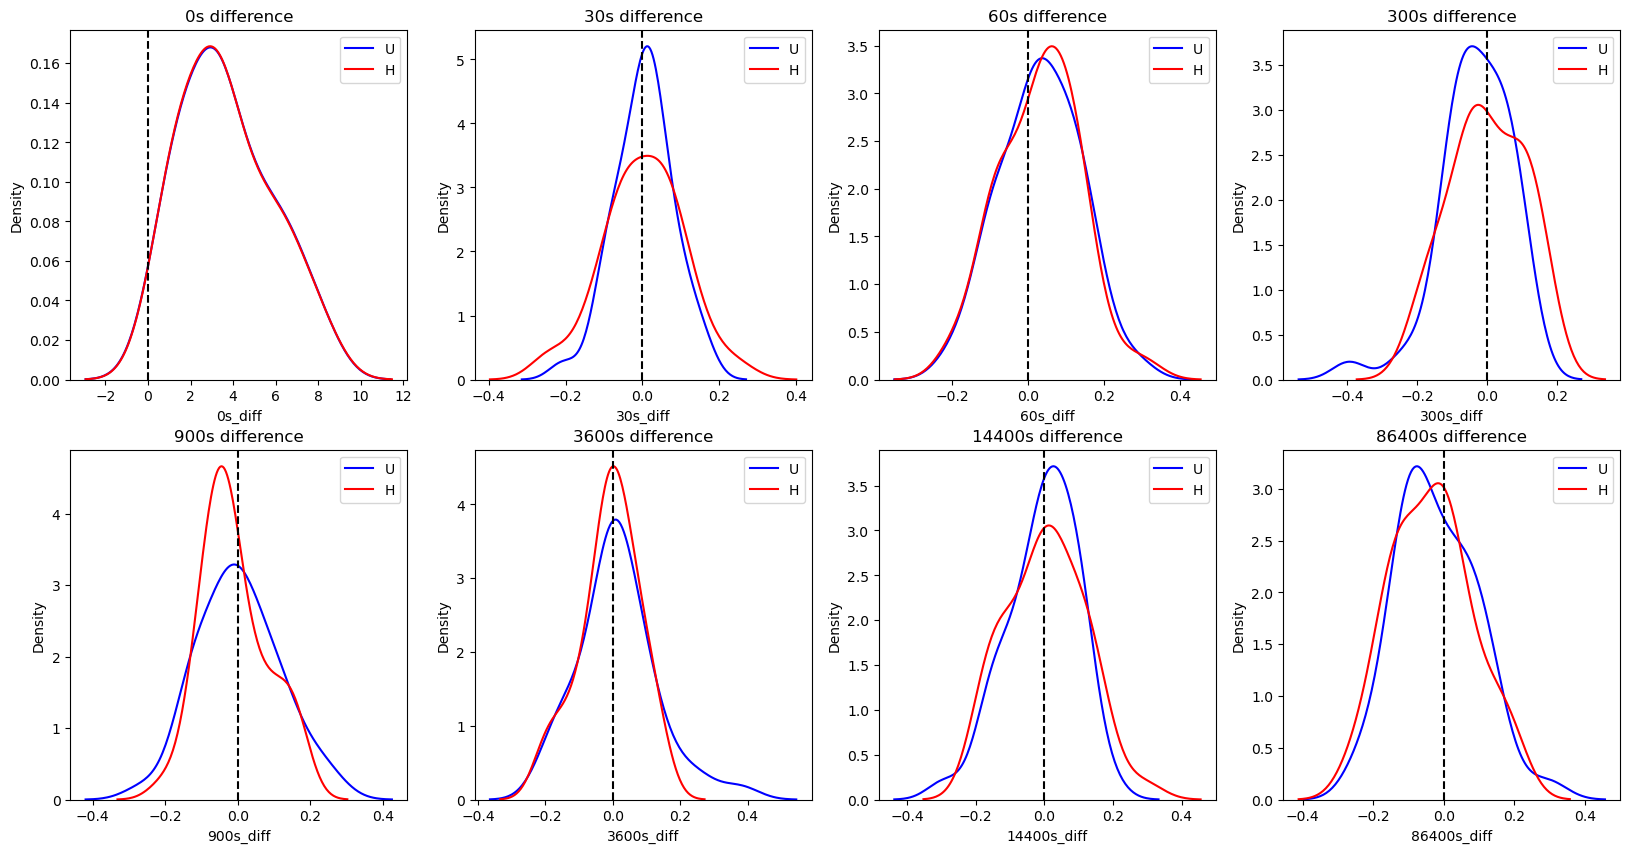

In [50]:
import seaborn as sns
#create subplots of the distribution of the difference between the noised and original time points for each time point
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
time_points = ['0s', '30s', '60s', '300s', '900s', '3600s', '14400s', '86400s']
for i, time_point in enumerate(time_points):
    ax = axs[i//4, i%4]
    sns.kdeplot(df[f'{time_point}_diff'], ax=ax, color='blue', label='U')
    sns.kdeplot(stateH[f'{time_point}_diff'], ax=ax, color='red', label='H')
    #plot x = 0 line
    ax.axvline(0, color='black', linestyle='--')
    ax.set_title(f'{time_point} difference')
    ax.legend()

In [61]:
df.to_csv('U_state.csv', index = False)

In [52]:
df

,peptide,30s,0s,60s,300s,900s,3600s,14400s,86400s,0s_noised_1,...,14400s_noised_avg,86400s_noised_avg,30s_diff,0s_diff,60s_diff,300s_diff,900s_diff,3600s_diff,14400s_diff,86400s_diff
0,NPQLAEEDK,4.800623,0.0,5.152012,5.839961,5.948223,5.950000,5.950000,5.950000,0.184293,...,5.967336,5.782666,0.033494,5.098563,-0.084171,-0.100815,0.073716,0.090507,0.017336,-0.167334
1,IIGDLSNR,1.532681,0.0,2.027357,3.643512,4.697445,5.096156,5.100000,5.100000,0.000000,...,5.193478,5.070294,0.020846,3.536544,-0.084031,0.075426,0.001547,0.039174,0.093478,-0.029706
2,VIDVLK,0.226449,0.0,0.427916,1.433324,2.203979,2.984389,3.382784,3.400000,0.000000,...,3.231981,3.269649,0.048931,1.826026,0.162697,0.010937,0.064006,-0.029082,-0.150803,-0.130351
3,KTAVLKLYVAGNTPNSVR,1.875532,0.0,2.032991,2.592164,2.927615,3.746645,5.066050,7.153558,0.000000,...,4.922538,7.214501,0.121941,3.298394,0.103569,-0.078587,0.115647,-0.093063,-0.143512,0.060943
4,EFKGVYALKVIDVLK,2.263258,0.0,3.133365,5.693575,7.526856,9.314874,10.317968,10.942577,0.000000,...,10.427318,10.846965,0.062941,6.349960,-0.103748,-0.042112,-0.007723,0.084425,0.109350,-0.095611
5,LYVAGNTPNSVR,1.870129,0.0,2.022214,2.539454,2.777835,3.269708,4.095701,5.429456,0.091795,...,3.949747,5.413062,0.011009,2.888041,0.027883,0.048694,0.213897,0.169487,-0.145954,-0.016393
6,ILATPTLAKVLPPPVR,1.618868,0.0,1.929173,2.486558,2.663859,2.970868,3.779312,5.333919,0.146030,...,3.803752,5.500044,-0.093223,2.662506,-0.018912,0.109947,-0.259886,-0.141612,0.024440,0.166124
7,GVYALK,0.359557,0.0,0.590567,1.110807,1.483347,2.092048,2.702872,3.310173,0.000000,...,2.646929,3.218406,-0.034785,1.470743,0.099177,-0.064377,-0.098817,-0.001294,-0.055943,-0.091767
8,VLPPPVR,0.162935,0.0,0.295025,0.757417,0.878543,0.963951,1.222064,1.673139,0.324919,...,1.410473,1.967952,-0.005211,0.829785,-0.119620,0.022382,-0.025744,-0.003974,0.188409,0.294814
9,VLPPPVRRIIGDLSNR,2.769995,0.0,3.589001,6.506853,8.216414,9.073182,9.340972,9.350000,0.129473,...,9.047518,9.459478,0.000160,6.315823,0.068842,0.019722,0.014421,0.025607,-0.293454,0.109478


In [ ]:
# df = pd.read_csv('U_state.csv') 

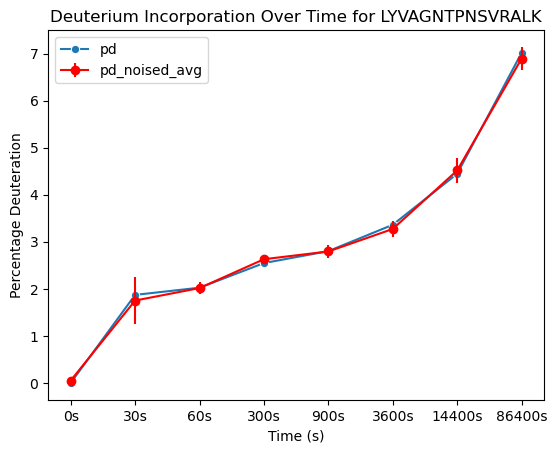

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the time points and the peptide sequence
time_points = ['0s', '30s', '60s', '300s', '900s', '3600s', '14400s', '86400s']
peptide_sequence = 'LYVAGNTPNSVRALK'

# Extract the data for the selected peptide
peptide_data = df.query(f"peptide == '{peptide_sequence}'")

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Time': time_points,
    'pd': [peptide_data[time_point].values[0] for time_point in time_points],
    'pd_noised': [peptide_data[f'{time_point}_noised_1'].values[0] for time_point in time_points],
    'pd_noised2': [peptide_data[f'{time_point}_noised_2'].values[0] for time_point in time_points],
    'pd_noised3': [peptide_data[f'{time_point}_noised_3'].values[0] for time_point in time_points]
})

# Get average and range of pd_noised_1, pd_noised_2, pd_noised_3
plot_data['pd_noised_avg'] = plot_data[['pd_noised', 'pd_noised2', 'pd_noised3']].mean(axis=1)
plot_data['pd_noised_range'] = plot_data[['pd_noised', 'pd_noised2', 'pd_noised3']].max(axis=1) - plot_data[['pd_noised', 'pd_noised2', 'pd_noised3']].min(axis=1)

# Convert 'Time' to a categorical type with a specific order
plot_data['Time'] = pd.Categorical(plot_data['Time'], categories=time_points, ordered=True)

# Make the line plot
sns.lineplot(x='Time', y='pd', data=plot_data, marker='o', label='pd')
# Plot average and range over the noised data
plt.errorbar(x=plot_data['Time'], y=plot_data['pd_noised_avg'], yerr=plot_data['pd_noised_range'], fmt='-o', color='red', label='pd_noised_avg')

plt.xlabel('Time (s)')
plt.ylabel('Percentage Deuteration')
plt.title(f'Deuterium Incorporation Over Time for {peptide_sequence}')
plt.legend()

# Show the plot
plt.show()

In [15]:
df


,peptide,30s,0s,60s,300s,900s,3600s,14400s,86400s,0s_noised_1,...,14400s_noised_avg,86400s_noised_avg,30s_diff,0s_diff,60s_diff,300s_diff,900s_diff,3600s_diff,14400s_diff,86400s_diff
0,NPQLAEEDK,4.800623,0.0,5.152012,5.839961,5.948223,5.950000,5.950000,5.950000,0.000000,...,5.899283,5.982052,0.100121,4.949352,0.050608,-0.073893,-0.128595,0.004783,-0.050717,0.032052
1,IIGDLSNR,1.532681,0.0,2.027357,3.643512,4.697445,5.096156,5.100000,5.100000,0.000000,...,5.128390,5.084379,0.027315,3.349736,-0.092141,0.165744,0.040531,-0.027623,0.028390,-0.015621
2,VIDVLK,0.226449,0.0,0.427916,1.433324,2.203979,2.984389,3.382784,3.400000,0.077305,...,3.333485,3.499485,-0.027913,1.691317,0.069108,-0.080486,0.028834,-0.116836,-0.049299,0.099485
3,KTAVLKLYVAGNTPNSVR,1.875532,0.0,2.032991,2.592164,2.927615,3.746645,5.066050,7.153558,0.186978,...,4.986228,7.148842,-0.026086,3.102617,-0.003276,-0.070862,-0.018713,-0.020695,-0.079822,-0.004716
4,EFKGVYALKVIDVLK,2.263258,0.0,3.133365,5.693575,7.526856,9.314874,10.317968,10.942577,0.076684,...,10.333265,10.940125,-0.062876,5.964523,0.028588,-0.056998,-0.060646,-0.108048,0.015297,-0.002452
5,LYVAGNTPNSVR,1.870129,0.0,2.022214,2.539454,2.777835,3.269708,4.095701,5.429456,0.134044,...,4.191165,5.339058,0.093738,2.762333,-0.026986,0.015525,0.061367,0.069279,0.095464,-0.090398
6,ILATPTLAKVLPPPVR,1.618868,0.0,1.929173,2.486558,2.663859,2.970868,3.779312,5.333919,0.095689,...,3.752906,5.328251,-0.026843,2.583450,0.065332,0.037784,-0.058090,0.116266,-0.026406,-0.005668
7,GVYALK,0.359557,0.0,0.590567,1.110807,1.483347,2.092048,2.702872,3.310173,0.211712,...,2.699519,3.397931,0.056746,1.415223,-0.143128,-0.036412,0.003723,-0.071708,-0.003354,0.087758
8,VLPPPVR,0.162935,0.0,0.295025,0.757417,0.878543,0.963951,1.222064,1.673139,0.174643,...,1.200805,1.732163,-0.013023,0.726571,0.009264,0.080458,-0.072896,-0.064925,-0.021259,0.059024
9,VLPPPVRRIIGDLSNR,2.769995,0.0,3.589001,6.506853,8.216414,9.073182,9.340972,9.350000,0.130355,...,9.328113,9.238850,-0.209305,5.920501,0.037343,0.012380,-0.028505,-0.093825,-0.012859,-0.111150


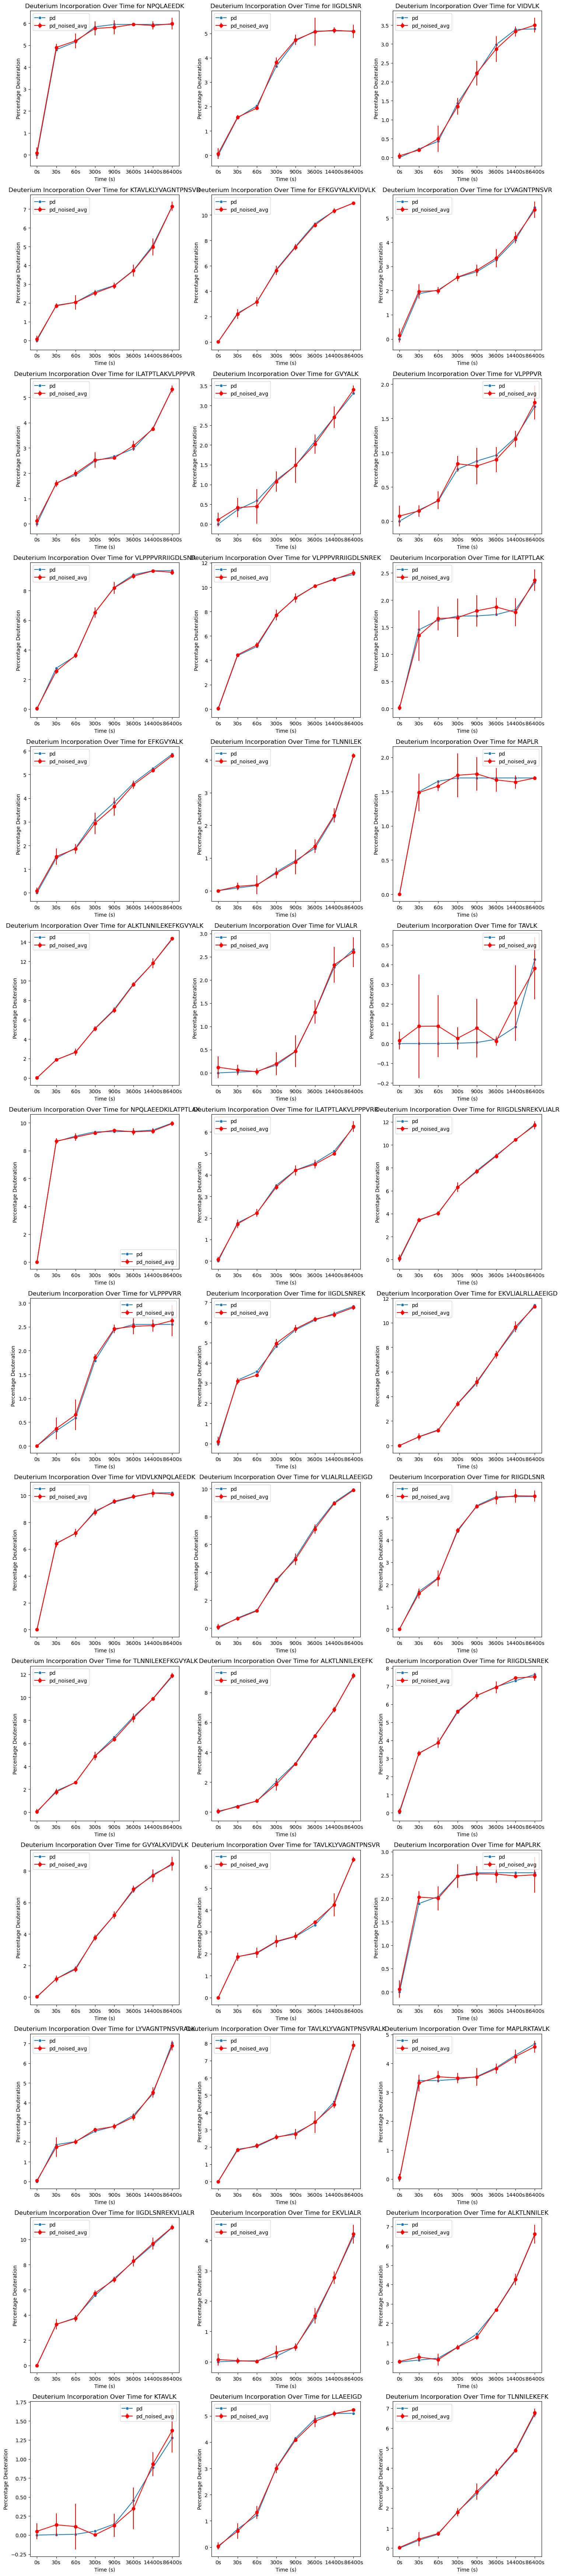

In [14]:
#I want to get the mean and range of three replicates for each time point for each peptide, how would I do that?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Define the time points
time_points = ['0s', '30s', '60s', '300s', '900s', '3600s', '14400s', '86400s']

# Get the unique peptides
peptides = df['peptide'].unique()

# Calculate the number of rows and columns for the subplots
num_peptides = len(peptides)
num_cols = 3  # You can adjust this number based on your preference
num_rows = math.ceil(num_peptides / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, peptide_sequence in enumerate(peptides):
    # Extract the data for the selected peptide
    peptide_data = df.query(f"peptide == '{peptide_sequence}'")

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'Time': time_points,
        'pd': [peptide_data[time_point].values[0] for time_point in time_points],
        'pd_noised': [peptide_data[f'{time_point}_noised_1'].values[0] for time_point in time_points],
        'pd_noised2': [peptide_data[f'{time_point}_noised_2'].values[0] for time_point in time_points],
        'pd_noised3': [peptide_data[f'{time_point}_noised_3'].values[0] for time_point in time_points]
    })

    # Get average and range of pd_noised_1, pd_noised_2, pd_noised_3
    plot_data['pd_noised_avg'] = plot_data[['pd_noised', 'pd_noised2', 'pd_noised3']].mean(axis=1)
    plot_data['pd_noised_range'] = plot_data[['pd_noised', 'pd_noised2', 'pd_noised3']].max(axis=1) - plot_data[['pd_noised', 'pd_noised2', 'pd_noised3']].min(axis=1)

    # Convert 'Time' to a categorical type with a specific order
    plot_data['Time'] = pd.Categorical(plot_data['Time'], categories=time_points, ordered=True)

    # Plot on the corresponding subplot
    ax = axes[i]
    sns.lineplot(x='Time', y='pd', data=plot_data, marker='o', label='pd', ax=ax)
    ax.errorbar(x=plot_data['Time'], y=plot_data['pd_noised_avg'], yerr=plot_data['pd_noised_range'], fmt='-o', color='red', label='pd_noised_avg')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Percentage Deuteration')
    ax.set_title(f'Deuterium Incorporation Over Time for {peptide_sequence}')
    ax.legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [28]:
import hdx_likelihood_function as hdx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hdx.total_likelihood(df)


(0    0.642202
 Name: 0s_noised_1, dtype: float64,
 0    0.0
 Name: 0s, dtype: float64)

In [29]:
peptide_list =set(df['peptide'])
time_points = ['0s', '30s', '60s', '300s', '900s', '3600s', '14400s', '86400s']
reps = ['1', '2', '3']

for peptide in peptide_list:
    for time in time_points:
        for rep in reps: 
            d_exp = df[df['peptide'] == peptide][f'{time}_noised_{rep}'].values[0]
            d_model = df[df['peptide'] == peptide][f'{time}'].values[0]
            print(d_exp, d_model)
        


0.642201522986354 0.0
0.1912199588820742 0.0
0.0824606288823103 0.0
0.01862759356079291 0.01862759356079291
0.4265022233245899 0.01862759356079291
0.2084848860721549 0.01862759356079291
0.8283299469815336 0.03709073981879247
0.03709073981879247 0.03709073981879247
0.03709073981879247 0.03709073981879247
0.17909187399684584 0.17909187399684584
0.17909187399684584 0.17909187399684584
0.17909187399684584 0.17909187399684584
0.4941872962864568 0.4941872962864568
0.4941872962864568 0.4941872962864568
0.4941872962864568 0.4941872962864568
2.1630605646448884 1.4371651729791868
2.212363496748533 1.4371651729791868
1.6598504861035623 1.4371651729791868
3.0873939638276093 2.7622382244979273
2.9610483531928136 2.7622382244979273
2.7622382244979273 2.7622382244979273
4.491372941932714 4.137994560721502
4.137994560721502 4.137994560721502
4.548078640698997 4.137994560721502
0.0 0.0
0.0 0.0
0.3613271212146086 0.0
2.967542931310491 2.7699952743509844
2.7699952743509844 2.7699952743509844
3.2383007380

In [23]:
d_exp = df[df['peptide'] == 'LYVAGNTPNSVRALK']['0s_noised_1'].values[0]
d_exp

0.17487901983163134